In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from collections import Counter
import numpy as np
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTEN
# from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.over_sampling import SVMSMOTE
# from imblearn.over_sampling import KMeansSMOTE
# from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

# from imblearn.under_sampling import ClusterCentroids
# from imblearn.under_sampling import NearMiss
# from imblearn.under_sampling import EditedNearestNeighbours
# from imblearn.under_sampling import RepeatedEditedNearestNeighbours
# from imblearn.under_sampling import AllKNN
# from imblearn.under_sampling import CondensedNearestNeighbour
# from imblearn.under_sampling import OneSidedSelection
# from imblearn.under_sampling import NeighbourhoodCleaningRule
# from imblearn.under_sampling import InstanceHardnessThreshold

from imblearn.combine import SMOTEENN
# from imblearn.combine import SMOTETomek

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix

# from sklearn.ensemble import BaggingClassifier
# from imblearn.ensemble import BalancedBaggingClassifier
# from imblearn.ensemble import RUSBoostClassifier
# from imblearn.ensemble import EasyEnsembleClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier

import pandas as pd

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    '''Convert class vector (integers from 0 to nb_classes)
    to binary class matrix, for use with categorical_crossentropy.
    '''
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1.
    return Y


def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp + 1e-06)
    npv = float(tn) / (tn + fn + 1e-06)
    sensitivity = float(tp) / (tp + fn + 1e-06)
    specificity = float(tn) / (tn + fp + 1e-06)
    mcc = float(tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-06)
    f1 = float(tp * 2) / (tp * 2 + fp + fn + 1e-06)
    return acc, precision, npv, sensitivity, specificity, mcc, f1

(1108, 279)
Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5125 - loss: 0.6906 - val_accuracy: 0.5393 - val_loss: 0.6725
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5398 - loss: 0.6418 - val_accuracy: 0.7247 - val_loss: 0.6026
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7894 - loss: 0.5242 - val_accuracy: 0.8090 - val_loss: 0.5053
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9050 - loss: 0.3830 - val_accuracy: 0.8483 - val_loss: 0.3620
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9130 - loss: 0.2321 - val_accuracy: 0.8876 - val_loss: 0.3247
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.1273 - val_accuracy: 0.8933 - val_loss: 0.3481
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9773 - loss: 0.0775 - val_accuracy: 0.9045 - val_loss: 0.3888
Epoch 8/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9796 - loss: 0.0571 - val_accuracy: 0.887

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
self_Attention:acc=0.830508,sensitivity=0.850575,specificity=0.811111,mcc=0.661855,f1=0.831461,roc_auc=0.887676, pr_auc=0.873800,
Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5358 - loss: 0.6876 - val_accuracy: 0.7006 - val_loss: 0.6523
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8130 - loss: 0.6071 - val_accuracy: 0.7966 - val_loss: 0.5044
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8940 - loss: 0.3777 - val_accuracy: 0.8192 - val_loss: 0.4146
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9491 - loss: 0.1763 - val_accuracy: 0.8249 - val_loss: 0.4163
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9691 - loss: 0.1257 - val_accuracy: 0.8305 - val_loss: 0.4631
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9656 - loss: 0.1089 - val_accuracy: 0.8192 - val_loss: 0.4576
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9777 - los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
self_Attention:acc=0.830508,sensitivity=0.852273,specificity=0.808989,mcc=0.661769,f1=0.833333,roc_auc=0.894471, pr_auc=0.880323,
Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4986 - loss: 0.6979 - val_accuracy: 0.7401 - val_loss: 0.6710
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7465 - loss: 0.6541 - val_accuracy: 0.8079 - val_loss: 0.5712
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.5093 - val_accuracy: 0.8701 - val_loss: 0.3832
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8946 - loss: 0.3036 - val_accuracy: 0.8644 - val_loss: 0.3083
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9555 - loss: 0.1612 - val_accuracy: 0.8757 - val_loss: 0.3347
Epoch 6/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9703 - loss: 0.1068 - val_accuracy: 0.8531 - val_loss: 0.3760
Epoch 7/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9714 - loss

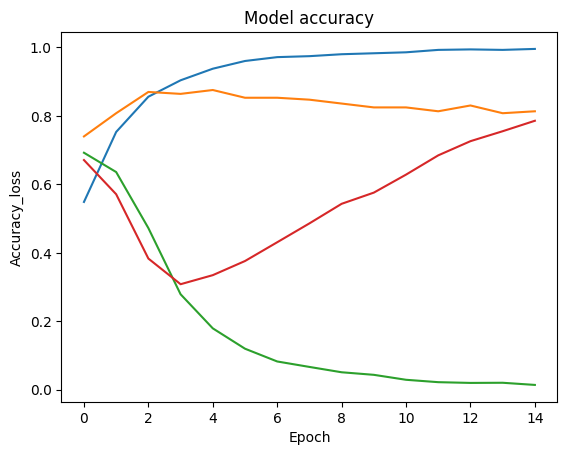

In [3]:

from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import keras
from tensorflow.keras.models import Sequential, model_from_json
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import GRU,Bidirectional
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.model_selection import StratifiedKFold,train_test_split
import os

from keras.layers import Dense,Input,Dropout

def get_CNN_model(input_dim,out_dim):
    model = Sequential()
    model.add(Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation= 'relu'))
    model.add(MaxPooling1D(pool_size=2,strides=1,padding="same"))
    model.add(Conv1D(filters = 16, kernel_size =  3, padding = 'same', activation= 'relu'))
    model.add(MaxPooling1D(pool_size=2,strides=1,padding="same"))
    # model.add(Bidirectional(GRU(32, return_sequences=True)))
    # model.add(Dropout(0.5))
    # model.add(Bidirectional(GRU(16, return_sequences=True)))
    # model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(int(input_dim/4), activation = 'relu'))
    model.add(Dense(int(input_dim/8), activation = 'relu'))
    model.add(Dense(out_dim, activation = 'softmax',name="Dense_2"))
    model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics =['accuracy'])
    return model
#binary_crossentropy  categorical_crossentropy


path = "/content/drive/MyDrive/Watashara_Projects/8-Dengue/"
data_ = pd.read_csv(path + 'Feature_Selection/GLasso_feat.csv')
# csv_file = pd.read_csv(path+ 'Feature_Selection/GLasso_Train_feat.csv')
# deep_llm_feat_train = np.column_stack((port_feat_train, Train_BiGRU_1500))
data_np = np.array(data_)
data_scaled = scale(data_np[:, :])
print(np.shape(data_np))

label1=np.ones((554 ,1))#Value can be changed
label2=np.zeros((554 ,1))
labels=np.append(label1,label2)
y = labels

X_train, X_ind, y_train, y_ind = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)
# number = 803

# rus = RandomUnderSampler(sampling_strategy={0: number})
# #rus = RandomUnderSampler(sampling_strategy={0: number}, random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X, y)
# print(X_resampled.shape)
# borderline_smote = BorderlineSMOTE()
# X_resampled, y_resampled = borderline_smote.fit_resample(X_resampled, y_resampled)
X = X_train
y = y_train

X = np.array(X,dtype=float)


[m1,n1] = np.shape(X)
# y = np.array(y_train)

# X =


fld_name = 'GLasso_CNN'

if not os.path.exists(path + (f'Results/{fld_name}/')):
    os.makedirs(path + f'Results/{fld_name}/')

# fld_name = 'TIP_GLall_CNN'

sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5


sepscores = []
sepscores_ = []
ytest=np.ones((1,2))*0.5
yscore=np.ones((1,2))*0.5

[sample_num,input_dim]=np.shape(X)
out_dim=2
ytest=np.ones((1,2))*0.5
yscore=np.ones((1,2))*0.5
probas_cnn=[]
tprs_cnn = []
sepscore_cnn = []

reduce_lr =keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
call = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=25),reduce_lr]

skf= StratifiedKFold(n_splits=5,shuffle=True)
for i, (train, test) in enumerate (skf.split(X,y)):
    clf_cnn = get_CNN_model(input_dim,out_dim)
    X_train_cnn=np.reshape(X[train],(-1,1,input_dim))
    X_test_cnn=np.reshape(X[test],(-1,1,input_dim))
    y_test=to_categorical(y[test])
    ytest=np.vstack((ytest,y_test))
    y_test_tmp=y[test]

    history = clf_cnn.fit(X_train_cnn, to_categorical(y[train]),validation_data=(X_test_cnn, y_test),epochs=15)#,callbacks = call)
    y_cnn_probas=clf_cnn.predict(X_test_cnn)
    probas_cnn.append(y_cnn_probas)
    y_class= categorical_probas_to_classes(y_cnn_probas)
    yscore=np.vstack((yscore,y_cnn_probas))

    acc, precision,npv, sensitivity, specificity, mcc,f1 = calculate_performace(len(y_class), y_class,y[test])
    mean_fpr = np.linspace(0, 1, 100)
    fpr, tpr, thresholds = roc_curve(y[test], y_cnn_probas[:, 1])
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test[:, 1], y_cnn_probas[:, 1])
    pr_auc = auc(recall, precision)
    sepscore_cnn.append([acc, sensitivity, specificity, mcc, f1, roc_auc, pr_auc])
    print('self_Attention:acc=%f,sensitivity=%f,specificity=%f,mcc=%f,f1=%f,roc_auc=%f, pr_auc=%f,'
          % (acc, sensitivity, specificity, mcc,f1, roc_auc, pr_auc))

    clf_cnn.save(path+ f'Results/{fld_name}/' + str(i) + 'CNN_new.keras')

# # serialize model to JSON
# model_json = clf_cnn.to_json()
# with open(path+"CNN_GRU/model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# clf_cnn.save_weights(path+"CNN_GRU/model.h5")
# print("Saved model to disk")

row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv( path + f'Results/{fld_name}/ytest.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(path +f'Results/{fld_name}/yscore.csv')

scores=np.array(sepscore_cnn)
result1=np.mean(scores,axis=0)
H1=result1.tolist()
sepscore_cnn.append(H1)
result=sepscore_cnn
data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path +f'Results/{fld_name}/results_CV.csv')
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy_loss')
plt.xlabel('Epoch')
plt.show()


***Indpendent data test ***

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

# csv_file = pd.read_csv(path+ 'Feature_Selection/GLasso_Test_weight_feat_2.csv')
# # deep_llm_feat_train = np.column_stack((port_feat_train, Train_BiGRU_1500))
# data_np = np.array(csv_file)
# Xt = data_np[:, :]
# labela=np.ones((73 ,1))  #Value can be changed
# labelb=np.zeros((598,1))
# labels=np.append(labela,labelb)
# yt = labels

Xt = X_ind
yt = y_ind
#
print(Xt.shape)
print(yt.shape)
###########################################################################################
[sample_num, input_dim] = np.shape(Xt)
Xt = np.reshape(Xt, (-1, 1, input_dim))




sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

for i in range(5):

    loaded_model = load_model(path+ f'Results/{fld_name}/' + str(i) + 'CNN_new.keras')
    print("Loaded model from disk")

    # evaluate loaded model on test data

    y_score = loaded_model.predict(Xt)
    y_class = categorical_probas_to_classes(y_score)

    y_test = to_categorical(yt)
    ytest = np.vstack((ytest, y_test))
    y_test_tmp = yt
    yscore = np.vstack((yscore, y_score))

    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class, y_test_tmp)
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    aupr = average_precision_score(y_test[:, 1], y_score[:, 1])

    # Calculate Precision-Recall AUC
    precision, recall, _ = precision_recall_curve(y_test[:, 1], y_score[:, 1])
    pr_auc = auc(recall, precision)
    sepscores.append([acc,  sensitivity, specificity, mcc, f1, roc_auc,pr_auc])
    print(f'CNN: acc={acc:.6f}, sensitivity={sensitivity:.6f}, specificity={specificity:.6f}, mcc={mcc:.6f}, f1={f1:.6f}, roc_auc={roc_auc:.6f},pr_auc={pr_auc:.6f}')


row=ytest.shape[0]
ytest=ytest[np.array(range(1,row)),:]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+ f'Results/{fld_name}/CNN_ytest_tes.csv')

yscore_=yscore[np.array(range(1,row)),:]
yscore_sum = pd.DataFrame(data=yscore_)
yscore_sum.to_csv(path+ f'Results/{fld_name}/CNN_yscore_test.csv')

scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+ f'Results/{fld_name}/CNN_test_results.csv')





(222, 279)
(222,)
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN: acc=0.855856, sensitivity=0.862069, specificity=0.849057, mcc=0.711126, f1=0.862069, roc_auc=0.927497,pr_auc=0.929831
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
CNN: acc=0.864865, sensitivity=0.905172, specificity=0.820755, mcc=0.730216, f1=0.875000, roc_auc=0.946324,pr_auc=0.940843
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN: acc=0.819820, sensitivity=0.810345, specificity=0.830189, mcc=0.639909, f1=0.824561, roc_auc=0.923064,pr_auc=0.920304
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN: acc=0.878378, sensitivity=0.896552, specificity=0.858491, mcc=0.756243, f1=0.885106, roc_auc=0.946365,pr_auc=0.943329
Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN: acc=0.846847, sensitivity=0.879310, specificity=0.811321, mcc=0.693343, f1=0.857143, roc_auc=0.926846,pr_auc=0.932084
